#### Analysis of w+; UAS-ArcLight/ +; R38G02-Gal4/ VT50384-lexA, lexAop-TNT Flies (Block flies)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sb
import os
import scipy.io
from scipy import stats
%matplotlib inline

import octopus as oct

In [2]:
filenames =['R38G02_ArcLight_VT50384-TNT013_2020-05-11_18.25VT50384lexA-TNT_Ftrace_mean',
            'R38G02_ArcLight_VT50384-TNT001_2020-05-12_12.46VT50384lexA-TNT_Ftrace_mean',
            'R38G02_ArcLight_VT50384-TNT001_2020-05-13_14.48VT50384lexA-TNT_Ftrace_mean',
            'R38G02_ArcLight_VT50384-TNT003_2020-05-14_14.17VT50384lexA-TNT_Ftrace_mean',
            'R38G02_ArcLight_VT50384-TNT001_2020-05-16_11.41VT50384lexA-TNT_Ftrace_mean',
            'R38G02_ArcLight_VT50384-TNT004_2020-05-16_13.09VT50384lexA-TNT_Ftrace_mean',
            'R38G02_ArcLight_VT50384-TNT008_2020-05-16_19.13VT50384lexA-TNT_Ftrace_mean']

In [3]:
# Import Data
time = np.load('time.npy')

for i in range(len(filenames)):
    a = np.load(filenames[i] + '.npy')
    if(i==0):
        Ftrace_all = a
    if(i==1):
        Ftrace_all = np.stack((Ftrace_all,a), axis=2)   
    if(i>1):
        a = a[:,:,np.newaxis]
        Ftrace_all = np.concatenate((Ftrace_all,a), axis=2)   

In [4]:
R38G02_TNT_Ctrl_Ftrace_all = np.load('R38G02_TNT_Ctrl_Ftrace_all.npy')
R38G02_TNT_Ctrl_Ftrace_mean = np.load('R38G02_TNT_Ctrl_Ftrace_mean.npy')
R38G02_TNT_Ctrl_MOI = np.load('R38G02_TNT_Ctrl_MOI.npy')
R38G02_TNT_Ctrl_LDir = np.load('R38G02_TNT_Ctrl_LDir.npy')

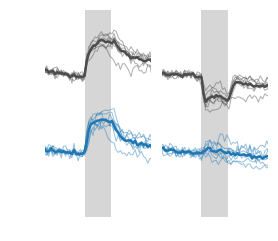

In [7]:
fig = plt.figure(figsize = (4, 3.8))

plt.subplots_adjust(wspace=0.1)

data = [R38G02_TNT_Ctrl_Ftrace_all, Ftrace_all]
colors = ['0.3', 'C0']
vsize = 0.14
alpha = 0.45

ax = fig.add_subplot(121)
plt.plot(time, data[0][:,6,:] + vsize*1.2, color = colors[0], alpha = alpha, linewidth = 1)
plt.plot(time, np.mean(data[0][:,6,:], axis=1)+ vsize*1.2, colors[0], linewidth = 2.5)

plt.plot(time, data[1][:,6,:], color = colors[1], alpha = alpha, linewidth = 1)
plt.plot(time, np.mean(data[1][:,6,:], axis=1), color = colors[1], linewidth = 2.5)

plt.axvspan(0, 1, facecolor='0.2', alpha=0.2)
plt.xlim([-1.5,2.5])
plt.ylim([-vsize,+vsize*2.2])
plt.axis('off') 


ax = fig.add_subplot(122)
plt.plot(time, data[0][:,2,:] + vsize*1.2, color = colors[0], alpha = alpha, linewidth = 1)
plt.plot(time, np.mean(data[0][:,2,:], axis=1)+ vsize*1.2, colors[0], linewidth = 2.5)

plt.plot(time,data[1][:,2,:], color = colors[1], alpha = alpha, linewidth = 1)
plt.plot(time,np.mean(data[1][:,2,:], axis=1), color = colors[1], linewidth = 2.5)

plt.axvspan(0, 1, facecolor='0.2', alpha=0.2)
plt.xlim([-1.5,2.5])
plt.ylim([-vsize,+vsize*2.2])
plt.axis('off')

bbox_inches = 'tight'
#plt.savefig('Fig2_R38G02_50384-TNT_Ftraces.pdf',bbox_inches='tight', dpi=600, transparent=True)
plt.show()

In [8]:
rotations = [0,45,90,135,180,225,270,315,360]
Ftrace_mean = np.zeros([len(rotations),len(filenames)])
Ftrace_sem = np.zeros([len(rotations)])
for i in range(len(rotations)):
    Ftrace_sem[i] = stats.sem(np.mean(Ftrace_all[38:51,i,:],0))
    for j in range(len(filenames)):
        Ftrace_mean[i,j] = np.mean(Ftrace_all[np.int(np.where(time == 0)[0]):51,i,j])

In [10]:
R38G02_TNT_Ctrl_Ftrace_sem= stats.sem(R38G02_TNT_Ctrl_Ftrace_mean,1)

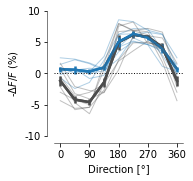

In [11]:
fig = plt.figure(figsize = (2.3, 2.3))

ax = fig.add_subplot(111) #PLOT directional tuning

ax.axhline(y=0,xmin=0.0001,xmax=0.9999, color='0.05', linestyle=':', linewidth = 1)
plt.plot(rotations, R38G02_TNT_Ctrl_Ftrace_mean, color='0.3', linewidth = 1, zorder = 3, alpha=0.35)
plt.plot(rotations, np.mean(R38G02_TNT_Ctrl_Ftrace_mean,1), linewidth = 2.5, color = '0.3')
plt.errorbar(rotations, np.mean(R38G02_TNT_Ctrl_Ftrace_mean,1), yerr = R38G02_TNT_Ctrl_Ftrace_sem, linewidth = 2.5, color = '0.3')

plt.plot(rotations, Ftrace_mean, color='C0', linewidth = 1, zorder = 0, alpha=0.35)
plt.plot(rotations, np.mean(Ftrace_mean,1), linewidth = 2.5, color = 'C0')
plt.errorbar(rotations, np.mean(Ftrace_mean,1), yerr = Ftrace_sem, linewidth = 2.5, color = 'C0')

plt.xticks(rotations)
ax.set_xticklabels(rotations)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines['left'].set_position(('outward', 7))
ax.spines['bottom'].set_position(('outward', 7))
for axis in ['top','bottom','left','right']:
  ax.spines[axis].set_linewidth(0.5)
ax.set_xlabel(u'Direction [°]', fontsize = 10)
ax.set_ylabel('-$\Delta F/F$ (%)', fontsize = 10)
yticks = np.array([-0.1,-0.05,0,0.05,0.1])
ax.set_yticks(yticks)
ax.set_yticklabels(('-10','-5','0','5','10'), size=10)
xticks = np.array([0,90,180,270,360])
ax.set_xticklabels(xticks, size=10)
ax.set_xticks(xticks)
plt.ylim([-0.1,0.1])

bbox_inches = 'tight'
#plt.savefig('Fig2_R38G02_50384-TNT_DirTuning.pdf',bbox_inches='tight', dpi=600, transparent=True)
plt.show()

In [12]:
# Input to MOI function
rot_rad = np.radians(rotations[0:8])
radius = np.mean(Ftrace_mean[0:8,:],1)

In [13]:
MOI_flies = np.empty(len(Ftrace_mean[0,:]))
for i in range(len(Ftrace_mean[0,:])):
    MOI_flies[i] = oct.MOI(rot_rad, Ftrace_mean[0:8,i])

D_magn =0.09982446524352627   D_deg = 234.93313049891128
H_magn =0.0   H_deg = 0.0
MOI = -0.0
D_magn =0.16211550789075363   D_deg = 241.78527051978247
H_magn =0.010978085572880327   H_deg = 282.62421657637776
MOI = 0.051231857617810656
D_magn =0.14735424069486844   D_deg = 226.61476123174342
H_magn =0.04022575349935324   H_deg = 232.42360437101078
MOI = 0.2715849783438977
D_magn =0.07817775755788055   D_deg = 261.10221528187265
H_magn =0.0   H_deg = 0.0
MOI = -0.0
D_magn =0.11660921515749734   D_deg = 266.6582626420043
H_magn =0.0   H_deg = 0.0
MOI = -0.0
D_magn =0.18566359729434367   D_deg = 233.98789091110476
H_magn =0.0   H_deg = 0.0
MOI = -0.0
D_magn =0.10696392080024346   D_deg = 241.04237530345816
H_magn =0.002069602482488793   H_deg = 180.0
MOI = 0.009367870692855567


In [14]:
LDir_flies = np.empty(len(Ftrace_mean[0,:]))
for i in range(len(Ftrace_mean[0,:])):
    LDir_flies[i] = oct.LDir(rot_rad, Ftrace_mean[0:8,i])

R_magn =0.09982446524352627   R_deg = 234.93313049891128
R_indiv_magn = 0.15504079495664402
LDir = 0.6438593485762338
R_magn =0.1705721255960516   R_deg = 244.19741918395792
R_indiv_magn = 0.2658832409522991
LDir = 0.6415301881574896
R_magn =0.1874176636375244   R_deg = 227.85948572097078
R_indiv_magn = 0.27861363522794574
LDir = 0.6726794382629192
R_magn =0.07817775755788055   R_deg = 261.10221528187265
R_indiv_magn = 0.21677338186445513
LDir = 0.36064279149717665
R_magn =0.11660921515749734   R_deg = 266.6582626420043
R_indiv_magn = 0.303287526155107
LDir = 0.38448404600016806
R_magn =0.18566359729434367   R_deg = 233.98789091110476
R_indiv_magn = 0.3382767641546383
LDir = 0.5488511685345029
R_magn =0.10798113019046786   R_deg = 240.08147306255157
R_indiv_magn = 0.19842348573364604
LDir = 0.5441953092962818


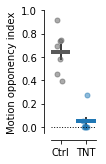

In [15]:
# Make Scatter Plot of MOI

pos = [0,1]

fig = plt.figure(figsize = (0.4*len(pos), 2.25))

ax = fig.add_subplot(111)
w = 0.6
wb = 0.6
data = [R38G02_TNT_Ctrl_MOI, MOI_flies]
colors = ['0.35', 'C0']

ax.axhline(y=0,xmin=0.0001,xmax=0.9999, color='0.05', linestyle=':', linewidth = 1)

for j in range (len(data)):
    ax.plot([pos[j]-w/2, pos[j]+w/2],[np.mean(data[j]),np.mean(data[j])],
            color=colors[j], linestyle='-', linewidth = 4)
    ax.errorbar(pos[j],np.mean(data[j]),yerr=[stats.sem(data[j])], color='k',zorder = 0)    
    for i in range(len(data[j])):
        ax.scatter(pos[j] + np.random.random(1) * w/2 - w/4, data[j][i], s=25, color=colors[j], alpha=0.5, zorder = 2) 
   
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines['left'].set_position(('outward', 7))
ax.spines['bottom'].set_position(('outward', 7))
ax.set_xticks(pos)
ax.set_xticklabels(('Ctrl', 'TNT'), size=10)
ax.set_ylabel('Motion opponency index', size=10)
ax.tick_params(axis='both', which='major', labelsize=10)
plt.ylim([-0.05,1])

bbox_inches = 'tight'
#plt.savefig('Fig2_R38G02_50384-TNT_MOI.pdf',bbox_inches='tight', dpi=600, transparent=True)
plt.show()

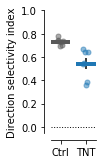

In [16]:
# Make Scatter Plot of LDir

pos = [0,1]

fig = plt.figure(figsize = (0.4*len(pos), 2.25))

ax = fig.add_subplot(111)
w = 0.6
wb = 0.6
data = [R38G02_TNT_Ctrl_LDir, LDir_flies]
colors = ['0.35', 'C0']

ax.axhline(y=0,xmin=0.0001,xmax=0.9999, color='0.05', linestyle=':', linewidth = 1)

for j in range (len(data)):
    ax.plot([pos[j]-w/2, pos[j]+w/2],[np.mean(data[j]),np.mean(data[j])],
            color=colors[j], linestyle='-', linewidth = 4)
    ax.errorbar(pos[j],np.mean(data[j]),yerr=[stats.sem(data[j])], color='k',zorder = 0)    
    for i in range(len(data[j])):
        ax.scatter(pos[j] + np.random.random(1) * w/2 - w/4, data[j][i], s=25, color=colors[j], alpha=0.5, zorder = 2) 
   
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines['left'].set_position(('outward', 7))
ax.spines['bottom'].set_position(('outward', 7))
ax.set_xticks(pos)
ax.set_xticklabels(('Ctrl', 'TNT'), size=10)
ax.set_ylabel('Direction selectivity index', size=10)
ax.tick_params(axis='both', which='major', labelsize=10)
plt.ylim([-0.05,1])

bbox_inches = 'tight'

#plt.savefig('Fig2_R38G02_50384-TNT_LDir.pdf',bbox_inches='tight', dpi=600, transparent=True)

plt.show()

In [17]:
print(stats.shapiro(R38G02_TNT_Ctrl_MOI))
print(stats.shapiro(MOI_flies))
print(stats.levene(MOI_flies, R38G02_TNT_Ctrl_MOI))
print(stats.ttest_ind(R38G02_TNT_Ctrl_MOI, MOI_flies, axis=0, equal_var=False))

(0.9576166272163391, 0.7980456948280334)
(0.5703294277191162, 0.00012091622193111107)
LeveneResult(statistic=2.5183041709825775, pvalue=0.13851688234335374)
Ttest_indResult(statistic=7.567521978473787, pvalue=2.8558036238534058e-05)


In [18]:
print(stats.shapiro(R38G02_TNT_Ctrl_LDir))
print(stats.shapiro(LDir_flies))
print(stats.levene(LDir_flies, R38G02_TNT_Ctrl_LDir))
print(stats.ttest_ind(R38G02_TNT_Ctrl_LDir, LDir_flies, axis=0, equal_var=False))

(0.9494369626045227, 0.7245703339576721)
(0.8646075129508972, 0.16640067100524902)
LeveneResult(statistic=7.2224233072331065, pvalue=0.019762577514505716)
Ttest_indResult(statistic=3.9067490539187886, pvalue=0.006552271148509719)
